# Introduction



* ## **Context**
This Analysis is To answer some question about Movie industry and analyzing movie gross revenue and find the factors that are highly correlated with gross revenue ,so this dataset is focused on movie revenue and i download and explored the data from [Here](https://www.kaggle.com/datasets/danielgrijalvas/movies/data)






* ## **Table of Contents**
    1. [Importing Data And Librarires]()
    2. [Exploring Data]()
    3. [Data Wrangling]()
    4. [Exploratory Data Analysis EDA]()
    5. [Conclusion]()


# Importing Data And Librarires

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [ ]:
df=pd.read_csv("/content/movies.csv")

# Exploring Data

In [ ]:
# To display all the records
#pd.set_option("display.max_rows",None)

In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
# Number of rows
df.shape[0]

7668

In [ ]:
# Number of columns
df.shape[1]

15

In [ ]:
# Check the data types for any  data standardization error
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [ ]:
# General Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [ ]:
# Check null values
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [ ]:
# Check if there's duplicated values
df.duplicated().sum()

0

# Data Wrangling

In [ ]:
# Handling Missing Values
df['budget'].fillna(np.mean(df['budget']),inplace=True)
df['rating'].fillna(df['rating'].mode()[0],inplace=True)
df['released'].fillna(df['released'].mode()[0],inplace=True)
df['score'].fillna(np.mean(df['score']),inplace=True)
df['votes'].fillna(np.mean(df['votes']),inplace=True)
df['writer'].fillna("Unknown",inplace=True)
df['star'].fillna("Unknown",inplace=True)
df['country'].fillna(df['country'].mode()[0],inplace=True)
df['gross'].fillna(np.mean(df['gross']),inplace=True)
df['company'].fillna("Unknown",inplace=True)
df['runtime'].fillna(np.mean(df['runtime']),inplace=True)

In [ ]:
# Standrize some attributes
df['budget']=df['budget'].astype('int64')
df['runtime']=df['runtime'].astype('int64')
df['gross']=df['gross'].astype('int64')
df['votes']=df['votes'].astype('int64')

In [ ]:
# Rename Country Column To avoid confusion
df.rename(columns={'country': 'IMDb Country Rating'}, inplace=True)

In [ ]:
# Extract the first occurrence of a four-digit sequence to extract the released year from column released
df['Released_Year'] = df['released'].str.extract(pat ='([0-9]{4})').astype(int)
#  Extract the Producing_Country from column released using regular expression
df['Producing_Country'] = df['released'].str.extract(r'\((.*?)\)').astype(str)

In [ ]:
# Drop un useful columns
df.drop(columns={'released','year'}, inplace=True)

In [ ]:
df_numerized = df.copy()
# cat.codes generates a series of numerical codes for each unique categorical value in the column  to convert categorical data into a numerical format
# For further use
for columns in df.columns:
   if(df_numerized[columns].dtype == 'object'):
        df_numerized[columns]= df_numerized[columns].astype('category')
        df_numerized[columns] = df_numerized[columns].cat.codes
df_numerized

,name,rating,genre,score,votes,director,writer,star,IMDb Country Rating,budget,gross,company,runtime,Released_Year,Producing_Country
0,6587,6,6,8.400000,927000,2589,4014,1047,54,19000000,46998772,2320,146,1980,56
1,5573,6,1,5.800000,65000,2269,1632,327,55,4500000,58853106,731,104,1980,56
2,5142,4,0,8.700000,1200000,1111,2567,1745,55,18000000,538375067,1540,124,1980,56
3,286,4,4,7.700000,221000,1301,2000,2246,55,3500000,83453539,1812,88,1980,56
4,1027,6,4,7.300000,108000,1054,521,410,55,6000000,39846344,1777,98,1980,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,6,6,3.100000,18,1500,2289,2421,55,7000,78500541,2283,90,2020,56
7664,1678,6,4,4.700000,36,774,2614,1886,55,35589876,78500541,539,90,2020,56
7665,4717,6,6,5.700000,29,2061,2683,2040,55,58750,78500541,941,107,2020,8
7666,2843,6,6,6.390411,88108,1184,1824,450,55,15000,78500541,2283,120,2020,56


# EDA

## **Correlations Analysis**

In [ ]:
df.corr()

<ipython-input-18-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,score,votes,budget,gross,runtime,Released_Year
score,1.000000,0.409182,0.064541,0.182868,0.399335,0.106144
votes,0.409182,1.000000,0.421007,0.628713,0.309168,0.218229
budget,0.064541,0.421007,1.000000,0.711270,0.265289,0.259488
gross,0.182868,0.628713,0.711270,1.000000,0.241336,0.245408
runtime,0.399335,0.309168,0.265289,0.241336,1.000000,0.120577
Released_Year,0.106144,0.218229,0.259488,0.245408,0.120577,1.000000


In [ ]:
# Find the relation between the gross and other attributes
df.corr()['gross']

<ipython-input-19-abf64525998e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['gross']


score            0.182868
votes            0.628713
budget           0.711270
gross            1.000000
runtime          0.241336
Released_Year    0.245408
Name: gross, dtype: float64

**`  we can see that there's strong correlation between budget and votes`**

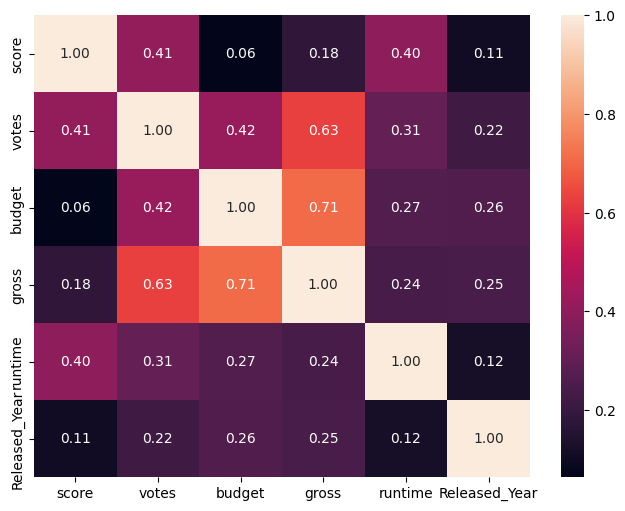

In [ ]:
# spearman : suitable for non-linear relationships,Measures monotonic relationships, robust to outliers
# Kendall's Ta : suitable for non-linear relationships, Measures ordinal association (monotonic relationships)
# Pearson correlation : used to assess relationships between continuous variables
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only = True), annot=True, fmt='.2f')
plt.show()

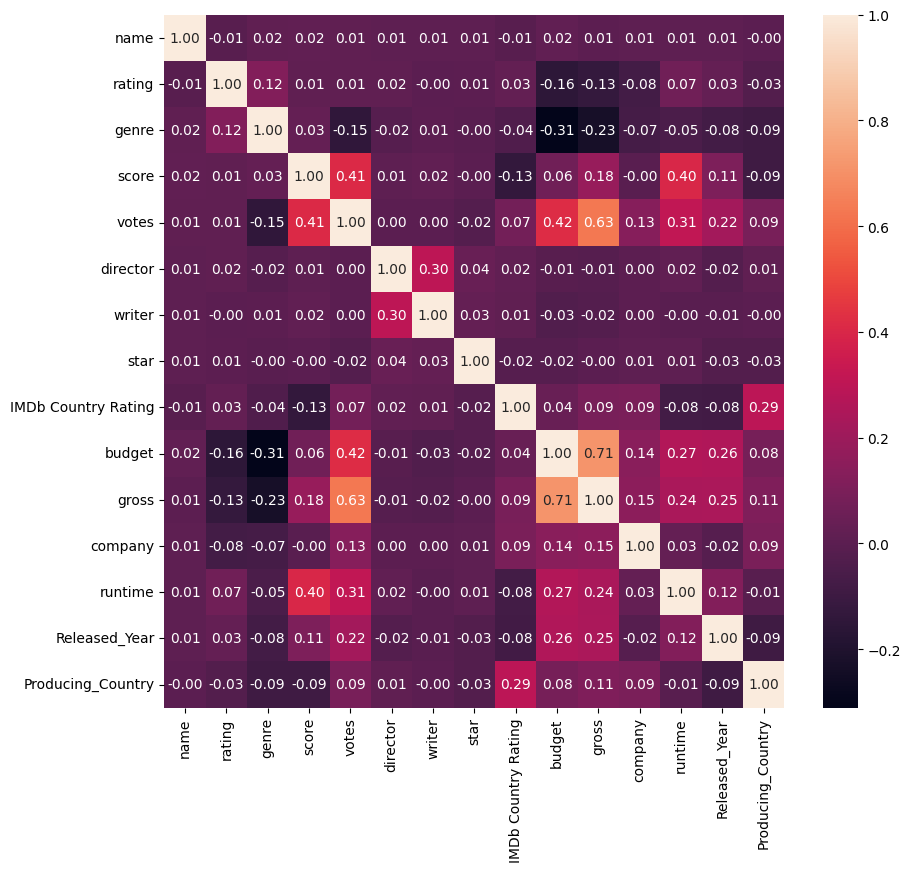

In [ ]:
# Show if there's others strong correlation between the non-numirc attributes
plt.figure(figsize=(10, 9))
sns.heatmap(df_numerized.corr(), annot=True, fmt='.2f')
plt.show()

In [ ]:
# Some statistical information
df.describe()

,score,votes,budget,gross,runtime,Released_Year
count,7668.000000,7.668000e+03,7.668000e+03,7.668000e+03,7668.000000,7668.00000
mean,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261476,2000.62024
std,0.968652,1.632918e+05,3.510036e+07,1.636697e+08,18.576401,11.16385
min,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000,1980.00000
25%,5.800000,9.100000e+03,1.400000e+07,4.681151e+06,95.000000,1991.00000
50%,6.500000,3.300000e+04,3.558988e+07,2.141330e+07,104.000000,2001.00000
75%,7.100000,9.300000e+04,3.558988e+07,7.850054e+07,116.000000,2010.00000
max,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000,2020.00000


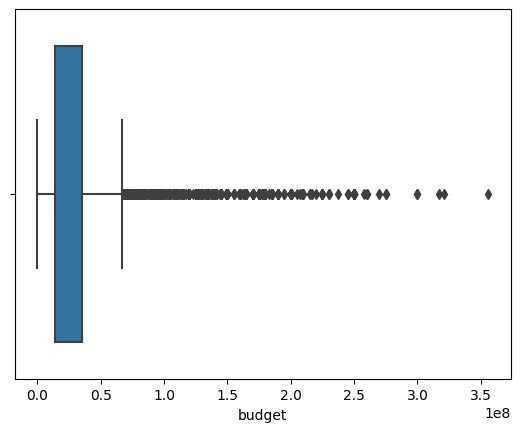

In [ ]:
sns.boxplot(x=df['budget'])
plt.show()

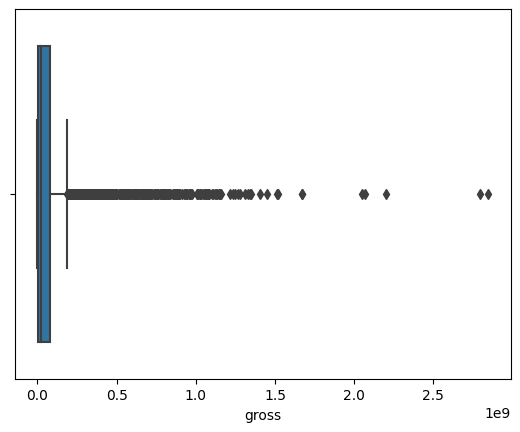

In [ ]:
sns.boxplot(x=df['gross'])
plt.show()

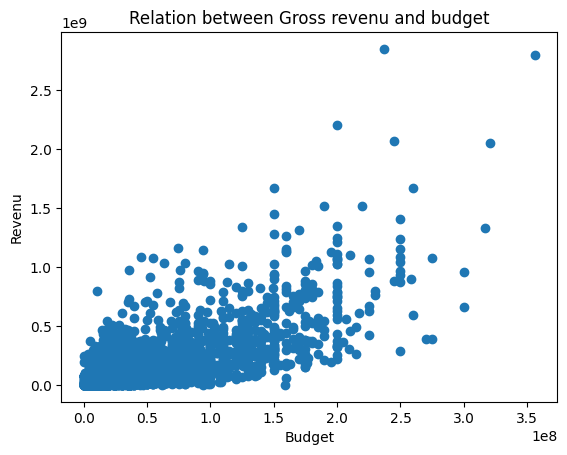

In [ ]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.title("Relation between Gross revenu and budget")
plt.xlabel("Budget")
plt.ylabel("Revenu")
plt.show()

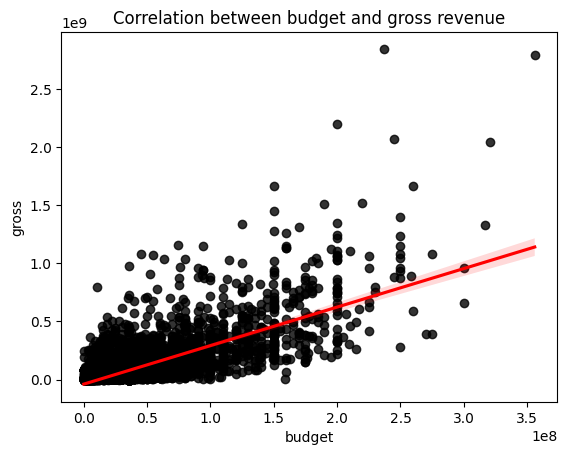

In [ ]:
sns.regplot(x=df['budget'],y=df['gross'],scatter_kws={"color":"black"},line_kws={"color":"red"})
plt.title('Correlation between budget and gross revenue')
plt.show()

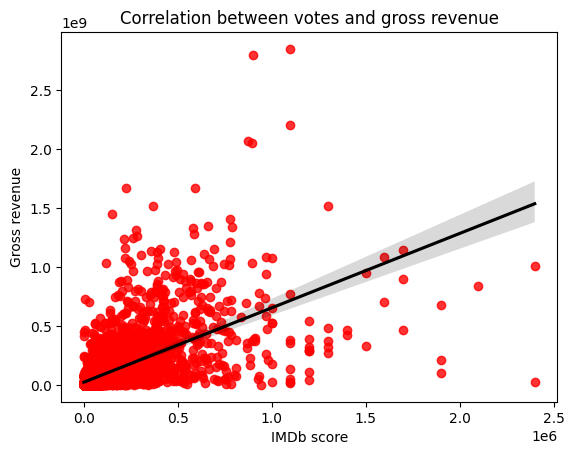

In [ ]:
sns.regplot(x='votes',y='gross',data=df,scatter_kws={'color': 'red'},line_kws={'color' : 'black'})
plt.title('Correlation between votes and gross revenue')
plt.xlabel('IMDb score')
plt.ylabel('Gross revenue')
plt.show()

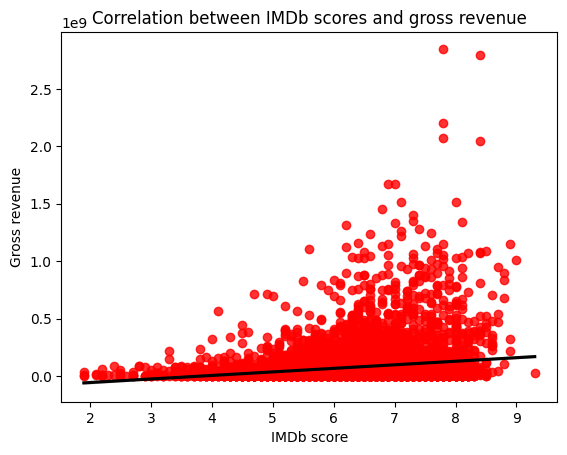

In [ ]:
sns.regplot(x='score',y='gross',data=df,scatter_kws={'color': 'red'},line_kws={'color' : 'black'})
plt.title('Correlation between IMDb scores and gross revenue')
plt.xlabel('IMDb score')
plt.ylabel('Gross revenue')
plt.show()

From our correlation analysis, we see that there's strong positive correlations between ***gross revenue vs budget*** , ***gross revenue vs votes*** and a weak postive correlation between **gross revenue vs Score**. In simpler terms, as the budget or the number of votes increases, there's a tendency for the gross earnings to also increase.

## **Gross revenue analysis**

* **Analysis the realation between Gross revenue Vs. Genre**

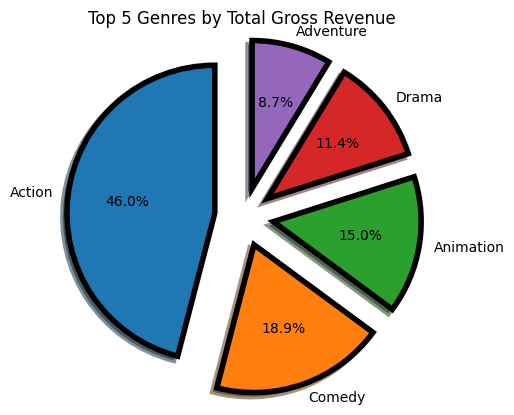

In [65]:
AVG_Gros_Ge=df.groupby("genre")['gross'].sum().reset_index()
AVG_Gros_Ge=AVG_Gros_Ge.sort_values('gross',ascending = False).head(5)
plt.pie(AVG_Gros_Ge['gross'], explode = (0.2, 0.2,0.2,0.2,0.2) ,labels = AVG_Gros_Ge['genre'].unique(),
        autopct = '%1.1f%%',shadow = True,
        startangle = 90,
        wedgeprops = {"edgecolor":"black",
                    'linewidth': 4})
plt.title('Top 5 Genres by Total Gross Revenue ')
plt.show()

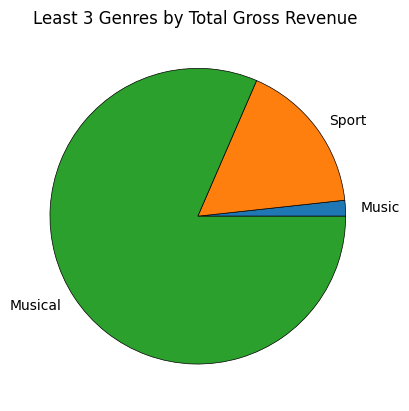

In [73]:
AVG_Gros_Ge = df.groupby('genre')[['gross']].sum().reset_index()
AVG_Gros_Ge = AVG_Gros_Ge.sort_values('gross', ascending = True).head(3)
AVG_Gros_Ge
plt.pie(AVG_Gros_Ge['gross'],labels = AVG_Gros_Ge['genre'].unique(),wedgeprops = {"edgecolor":"black",'linewidth': 0.5})
plt.title('Least 3 Genres by Total Gross Revenue ')
plt.show()

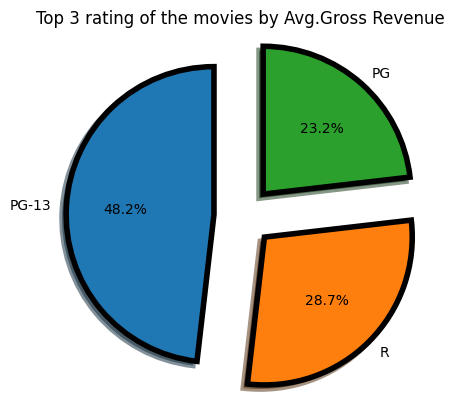

In [60]:
AVG_Gros_Ge=df.groupby("rating")['gross'].sum().reset_index()
AVG_Gros_Ge=AVG_Gros_Ge.sort_values('gross',ascending = False).head(3)
plt.pie(AVG_Gros_Ge['gross'], explode = (0.2, 0.2,0.2) ,labels = AVG_Gros_Ge['rating'].unique(),
        autopct = '%1.1f%%',shadow = True,
        startangle = 90,
        wedgeprops = {"edgecolor":"black",
                    'linewidth': 4})
plt.title('Top 3 rating of the movies by Avg.Gross Revenue ')
plt.show()

* **Analysis the realation between Gross revenue Vs. Stars**

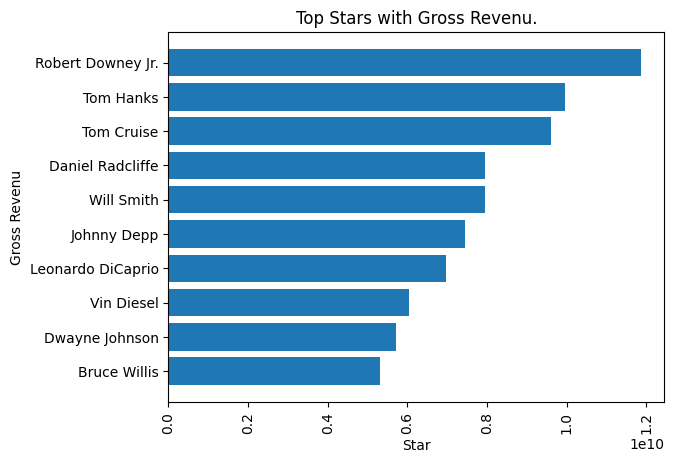

In [ ]:
AVG_S_Gross = df.groupby('star')['gross'].sum().reset_index()
AVG_S_Gross = AVG_S_Gross.sort_values('gross', ascending = False).head(10)
plt.barh(AVG_S_Gross['star'],AVG_S_Gross['gross'])
plt.xticks(rotation="vertical")
plt.xlabel("Star")
plt.ylabel("Gross Revenu")
plt.title("Top Stars with Gross Revenu.")
plt.gca().invert_yaxis()
plt.show()

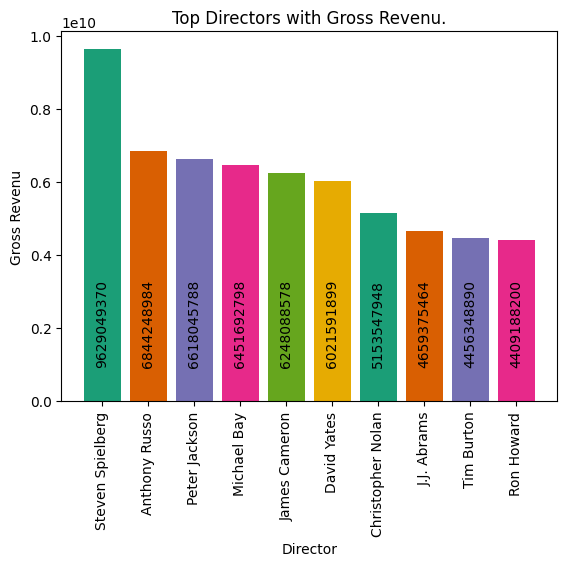

In [ ]:
AVG_S_Gross = df.groupby('director')['gross'].sum().reset_index()
AVG_S_Gross = AVG_S_Gross.sort_values('gross', ascending = False).head(10)
fig, ax = plt.subplots()
ax.bar(AVG_S_Gross['director'],AVG_S_Gross['gross'],label=AVG_S_Gross['director'],color=sns.palettes.mpl_palette('Dark2'))
for bar, state in zip(ax.patches, AVG_S_Gross['gross']):
    ax.text(bar.get_x()+bar.get_width()/2,1000000000, state, rotation=90, color = 'black', ha = 'center')
plt.xticks(rotation="vertical")
plt.xlabel("Director")
plt.ylabel("Gross Revenu")
plt.title("Top Directors with Gross Revenu.")
plt.show()

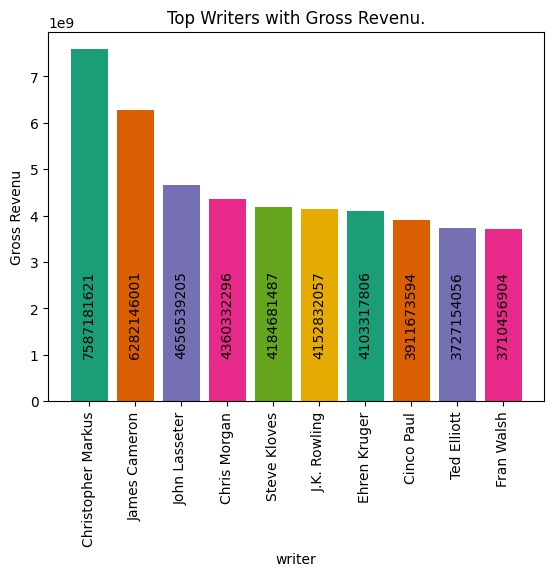

In [ ]:
AVG_S_Gross = df.groupby('writer')['gross'].sum().reset_index()
AVG_S_Gross = AVG_S_Gross.sort_values('gross', ascending = False).head(10)
fig, ax = plt.subplots()
ax.bar(AVG_S_Gross['writer'],AVG_S_Gross['gross'],label=AVG_S_Gross['writer'],color=sns.palettes.mpl_palette('Dark2'))
for bar, state in zip(ax.patches, AVG_S_Gross['gross']):
    ax.text(bar.get_x()+bar.get_width()/2,1000000000, state, rotation=90, color = 'black', ha = 'center')
plt.xticks(rotation="vertical")
plt.xlabel("writer")
plt.ylabel("Gross Revenu")
plt.title("Top Writers with Gross Revenu.")
plt.show()

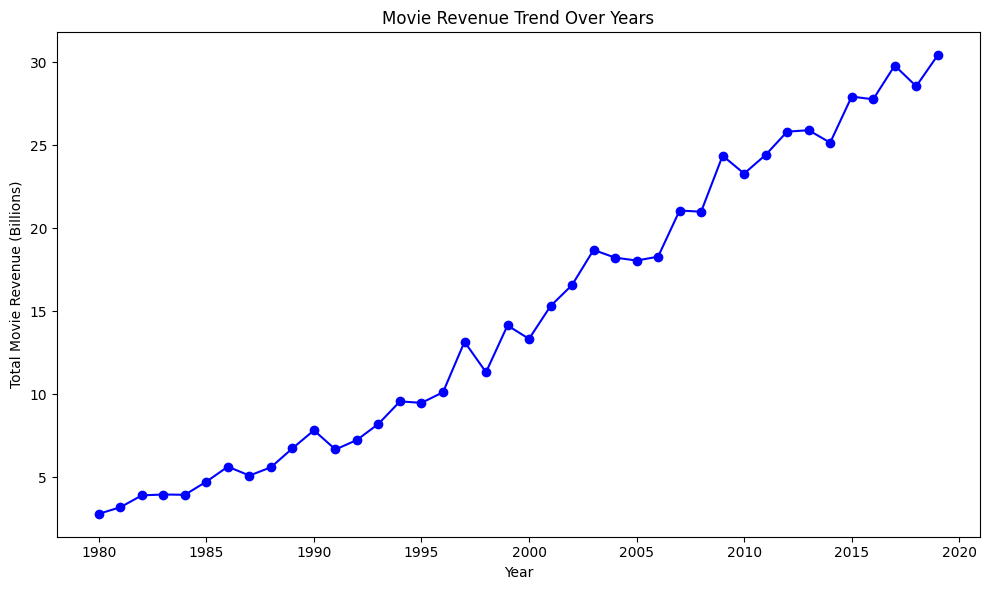

,Released_Year,gross
0,1980,2800470741
1,1981,3195575135
2,1982,3911555766
3,1983,3963184237
4,1984,3945933788


In [ ]:
Year_ = df.groupby('Released_Year')[['gross']].sum().reset_index()
Year_ = Year_.sort_values('Released_Year', ascending = True)
Year_.head()
#After exploring the data, we discover that the released year column for 2020 only covers up to September. so we drop it
Year_ = Year_[Year_['Released_Year'] != 2020]

plt.figure(figsize=(10, 6))
plt.plot(Year_['Released_Year'], Year_['gross'] / 1e9, marker='o', color='blue', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Movie Revenue (Billions)')
plt.title('Movie Revenue Trend Over Years')
plt.show()

# Conclusion

* From our correlation analysis, we discovered that **gross revenue vs budget** , **gross revenue vs votes**  has  strong positive correlations and  **gross revenue vs Score** has a weak postive correlation .
* To gain more insight, we then created visualizations for gross revenue sorted by genres, rating, stars, Weiters, directors and years and came up with the following findings:
    1.  We notice that **Action**” genre constitutes 46 % the total gross earnings among All Genre. This indicates that **Action** movies have contributed significantly to the overall earnings, holding the largest share among these top genres. It is followed by the **Comedy** genre at 18.9 % and the **animation** genre at 15%. The 3 genres that contribute the least to gross earnings are **Musical**, **Sport** and **Music** genres.
    2.   The Top 3 rating of the movies by Total Gross Revenue are **PG-13, R, and PG**.
    3. The Top 3 actors with the highest Movie revenue are **Robert Downey Jr., Tom Hanks, and Tom Cruise**.
    4. The  Top 3 Directors with the highest Movie revenue are **Steven Spielberg	, Anthony Russo	, and Peter Jackson**.
    5. The  Top 3 Writers with the highest Movie revenue are **Christopher Markus	, James Cameron	, and John Lasseter**.
    6. The line chart Shows that movie industry earnings has exhibit an **increasing trajectory** over the years.

